**CLASIFICADOR LINEAL**

In [0]:
iris = "https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/iris.csv"

In [2]:
iris

'https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/iris.csv'

In [0]:
import pandas as pd

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(iris)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [11]:
df[df['variety'] == "Versicolor"].describe()

,sepal.length,sepal.width,petal.length,petal.width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [0]:
variedades = df.groupby("variety")

In [15]:
variedades.size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [16]:
variedades.mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


sepal.length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal.width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal.length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal.width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

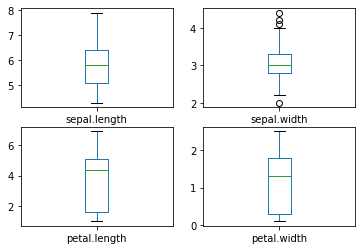

In [20]:
df.plot(kind="box", subplots=True, layout=(2,2))

**hacer el calculo para clases separadas (versicolor,...) con el groupby**

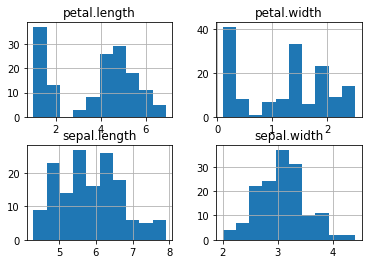

In [22]:
df.hist();

**Histograma, mediante el groupby**

In [0]:
colores = df["variety"].replace({"Setosa":"red","Virginica":"blue","Versicolor":"green"})

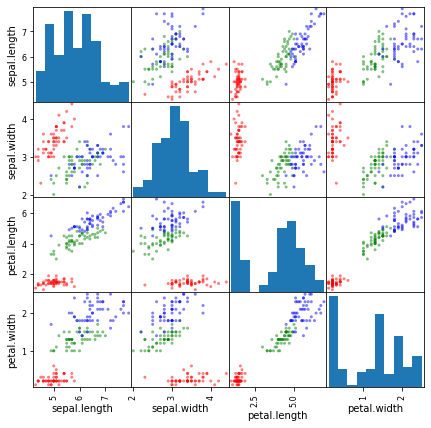

In [31]:
pd.plotting.scatter_matrix(df,c=colores,figsize=(7,7));

In [0]:
import seaborn as sns
sns.set_palette('husl')

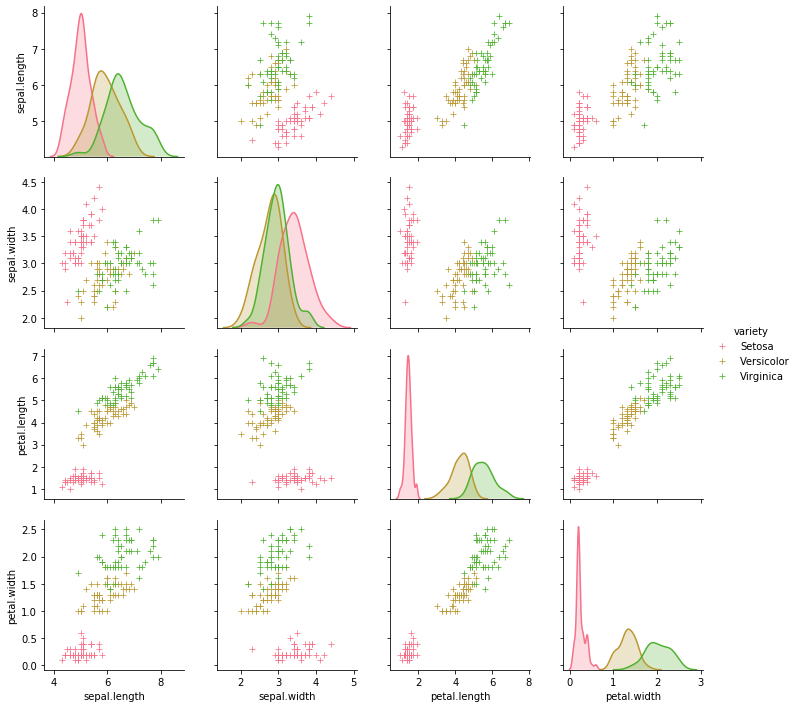

In [33]:
g=sns.pairplot(df,hue='variety',markers='+')

In [0]:
X = df.drop(["variety"], axis=1)

In [0]:
y=df["variety"]

In [0]:
np.random.seed(0)
test_ids = np.random.permutation(len(X))

In [0]:
x_train = X.iloc[test_ids[:-10]]
y_train = y.iloc[test_ids[:-10]]

In [0]:
x_test = X.iloc[test_ids[-10:]]
y_test = y.iloc[test_ids[-10:]]

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg=LogisticRegression()

In [47]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(x_test)

In [49]:
y_pred

array(['Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Setosa'],
      dtype=object)

In [50]:
print(y_test)

88     Versicolor
70     Versicolor
87     Versicolor
36         Setosa
21         Setosa
9          Setosa
103     Virginica
67     Versicolor
117     Virginica
47         Setosa
Name: variety, dtype: object


In [0]:
from sklearn import metrics

In [53]:
metrics.accuracy_score(y_test, y_pred)*100

90.0

**Árboles de desición**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.predict_proba(x_test)[:,1]

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

K-Nearest Neighboors (KNN)

Linear Discriminat Analysis(LDA)

Classification and Regression Trees (CART)

Gaussian Naive Bayes (NB)

Support Vector Machines (SVM)